In [1]:
import numpy as np
import xarray as xr
import cartopy.crs as ccrs


In [2]:
fname_in = 'sp_mode-dev053-srof-revertnocomp_label-revertsmallarea.fates-sci.1.46.2_api.16.1.0-ctsm5.1.dev053-Cb9f4ef9a-F51112204.twoyears.nc'
fin = xr.open_dataset(fname_in)

fname2_in = 'seb_CLM5-SPfates-def_rewindtest0.4years.nc'
fin2 = xr.open_dataset(fname2_in)

This is a map of where each PFT is present:  

/Users/cdkoven/miniconda2/envs/py3/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


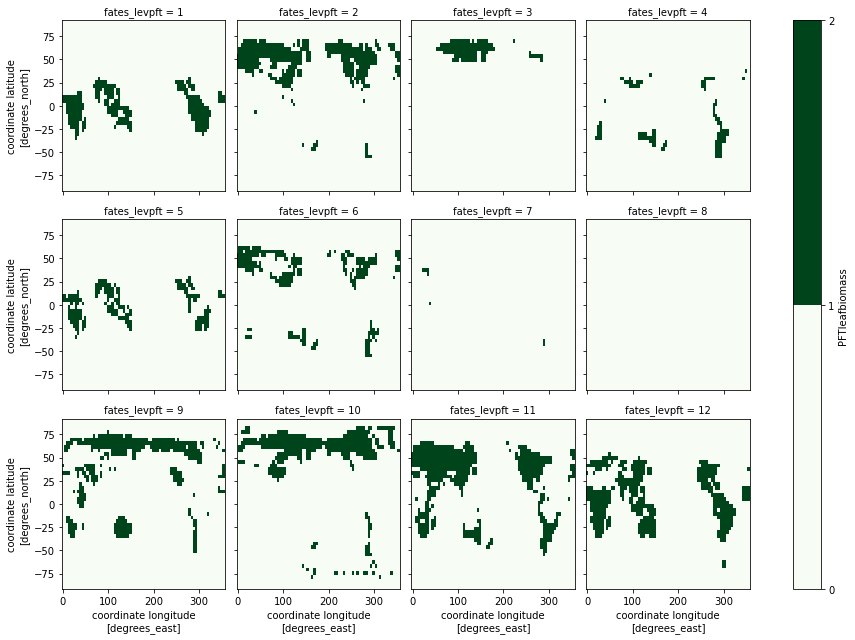

In [3]:
(fin.PFTleafbiomass.mean(dim='time') > 1e-5).plot(x='lon',y='lat',col='fates_levpft', col_wrap=4, levels=np.arange(3), cmap='Greens')



The next cell is a map of where each PFT has leaf biomass that varies, starting at the second month.  
This uses the recent PR tag  



/Users/cdkoven/miniconda2/envs/py3/lib/python3.7/site-packages/xarray/core/nputils.py:215: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


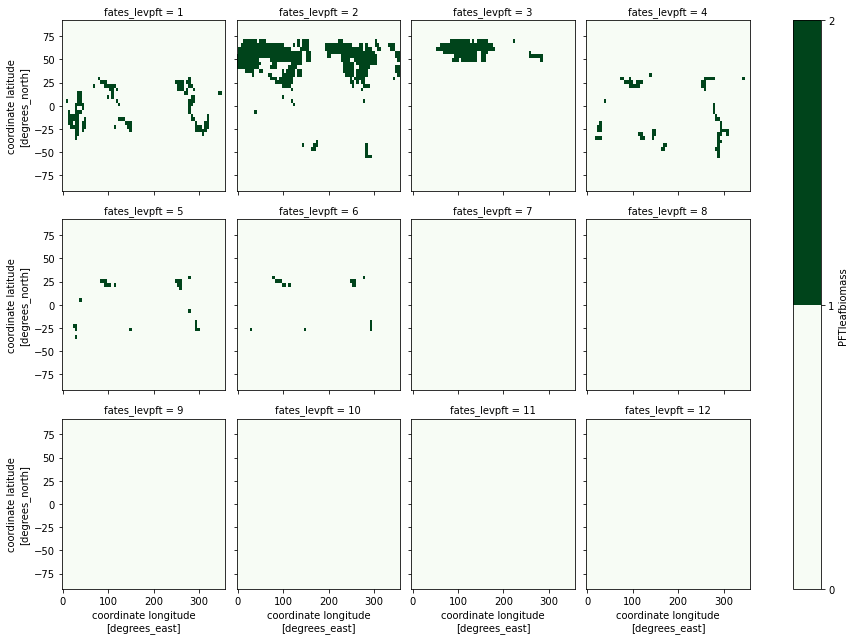

In [4]:
fg = (fin.PFTleafbiomass.isel(time=slice(1,24)).var(dim='time') > 1e-5).plot(x='lon',y='lat',col='fates_levpft', col_wrap=4, levels=np.arange(3), cmap='Greens')



The next cell shows gridcells where all of the following are true:  
1. a given PFT is present  
2. the variance in file 1 (recent) and 2 (Rosie's) are the same, starting from the second month  
3. the mean in file 1 and 2 are the same, starting from the second month  

/Users/cdkoven/miniconda2/envs/py3/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


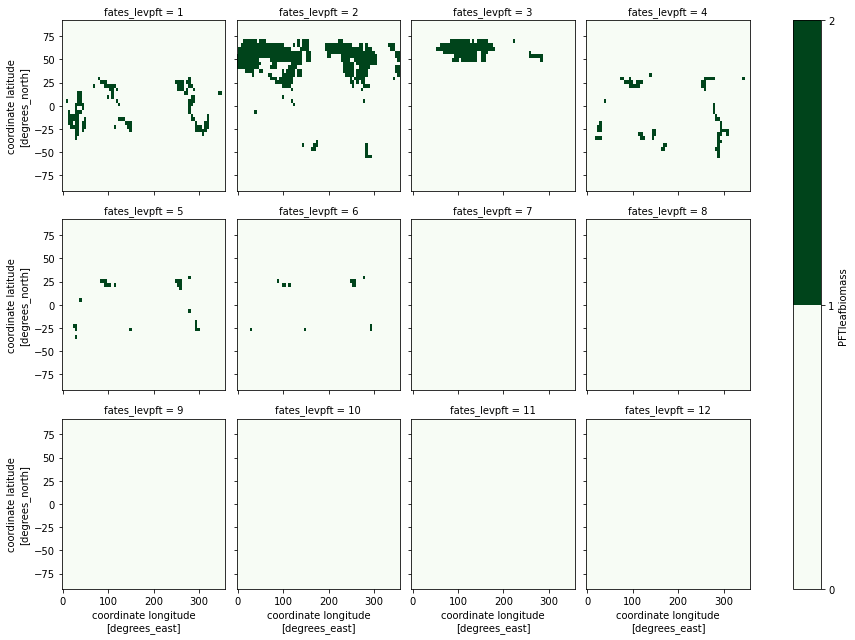

In [5]:
fg = ((fin2.PFTleafbiomass.isel(time=slice(1,24)).var(dim='time') > 1e-5) * (fin.PFTleafbiomass.isel(time=slice(1,24)).var(dim='time')  == fin2.PFTleafbiomass.isel(time=slice(1,24)).var(dim='time')) * (fin.PFTleafbiomass.isel(time=slice(1,24)).mean(dim='time')  == fin2.PFTleafbiomass.isel(time=slice(1,24)).mean(dim='time')) ).plot(x='lon',y='lat',col='fates_levpft', col_wrap=4, levels=np.arange(3), cmap='Greens')


 

I made a map of where the bare ground patch is greater than some threshold (which doesn't seem to explain anything).  

/Users/cdkoven/miniconda2/envs/py3/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


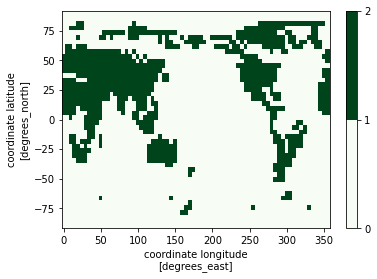

In [6]:
pftzero_area = fin.PATCH_AREA_BY_AGE.sum(dim='fates_levage').mean(dim='time') - fin.AREA_PLANT.mean(dim='time')
(pftzero_area > .05).plot(levels=np.arange(3), cmap='Greens')